<a href="https://colab.research.google.com/github/kshitijrajsharma/obe/blob/main/example_obe_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open Buildings Extractor (OBE)

This notebook demonstrates how to extract and compare building footprints from different sources for your area of interest using the OBE package.

In [ ]:
!pip install obe

In [ ]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from obe.app import download_buildings

## Input GeoJSON
Example area in Pokhara, Nepal

In [ ]:
# Test area - Pokhara, Nepal
TEST_GEOJSON = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {},
            "geometry": {
                "coordinates": [
                    [
                        [83.96184435207743, 28.212767538129086],
                        [83.96184435207743, 28.20236573207498],
                        [83.97605449676462, 28.20236573207498],
                        [83.97605449676462, 28.212767538129086],
                        [83.96184435207743, 28.212767538129086],
                    ]
                ],
                "type": "Polygon",
            },
        }
    ],
}

In [ ]:
# Save GeoJSON to file
input_file = "test_aoi.geojson"
with open(input_file, "w") as f:
    json.dump(TEST_GEOJSON, f)

# Create AOI GeoDataFrame for plotting
aoi_gdf = gpd.GeoDataFrame.from_features(TEST_GEOJSON["features"], crs="EPSG:4326")

## Download buildings from individual source

This is how you can download each source one by one , Uncomment and you can run the block you want

In [ ]:
# ## Google
# download_buildings(
#         source='google',
#         input_path=input_file,
#         output_path='google_buildings.geojson',
#         format="geojson",
#     )

# ## Microsoft
# download_buildings(
#         source='microsoft',
#         input_path=input_file,
#         output_path='microsoft_buildings.geojson',
#         format="geojson",
#         location="Nepal",
#     )

# ## OpenStreetMap
# download_buildings(
#         source='osm',
#         input_path=input_file,
#         output_path='osm_buildings.geojson',
#         format="geojson",
#     )

# ## Overture
# download_buildings(
#         source='overture',
#         input_path=input_file,
#         output_path='overture_buildings.geojson',
#         format="geojson",
#     )

## Download them all together

This automates to download all sources together

In [ ]:
sources = {
    "google": {"location": None},
    "microsoft": {"location": "Nepal"}, # location is only required for Microsoft
    "osm": {"location": None},
    "overture": {"location": None}
}

# Download buildings from each source
results = {}
for source, params in sources.items():
    output_file = f"{source}_buildings.geojson"
    print(f"\nProcessing {source.upper()} buildings...")

    download_buildings(
        source=source,
        input_path=input_file,
        output_path=output_file,
        format="geojson",
        location=params["location"]
    )

    results[source] = gpd.read_file(output_file)


Processing GOOGLE buildings...
Found 1 S2 tiles covering the AOI
https://storage.googleapis.com/open-buildings-data/v3/polygons_s2_level_6_gzip_no_header/3995_buildings.csv.gz


Processed 6467 building footprints.
Saving results to google_buildings.geojson...
Results successfully saved to google_buildings.geojson.

Processing MICROSOFT buildings...
The input area spans 1 tiles: ['123130331']


100%|██████████| 1/1 [00:18<00:00, 18.55s/it]


Processed 1916 building footprints.
Saving results to microsoft_buildings.geojson...
Results successfully saved to microsoft_buildings.geojson.

Processing OSM buildings...
Processed 3056 building footprints.
Saving results to osm_buildings.geojson...
Results successfully saved to osm_buildings.geojson.

Processing OVERTURE buildings...
Processing AOI with bounding box: 83.96184435207743,28.20236573207498,83.97605449676462,28.212767538129086
Processed 4659 building footprints.
Saving results to overture_buildings.geojson...
Results successfully saved to overture_buildings.geojson.


## Compare Results

In [ ]:
# Print statistics
print("Building Footprint Statistics:")
for source, gdf in results.items():
    print(f"\n{source.upper()}:")
    print(f"Number of buildings: {len(gdf)}")

Building Footprint Statistics:

GOOGLE:
Number of buildings: 6467

MICROSOFT:
Number of buildings: 1916

OSM:
Number of buildings: 3056

OVERTURE:
Number of buildings: 4659


## Visualize Spatial Distribution

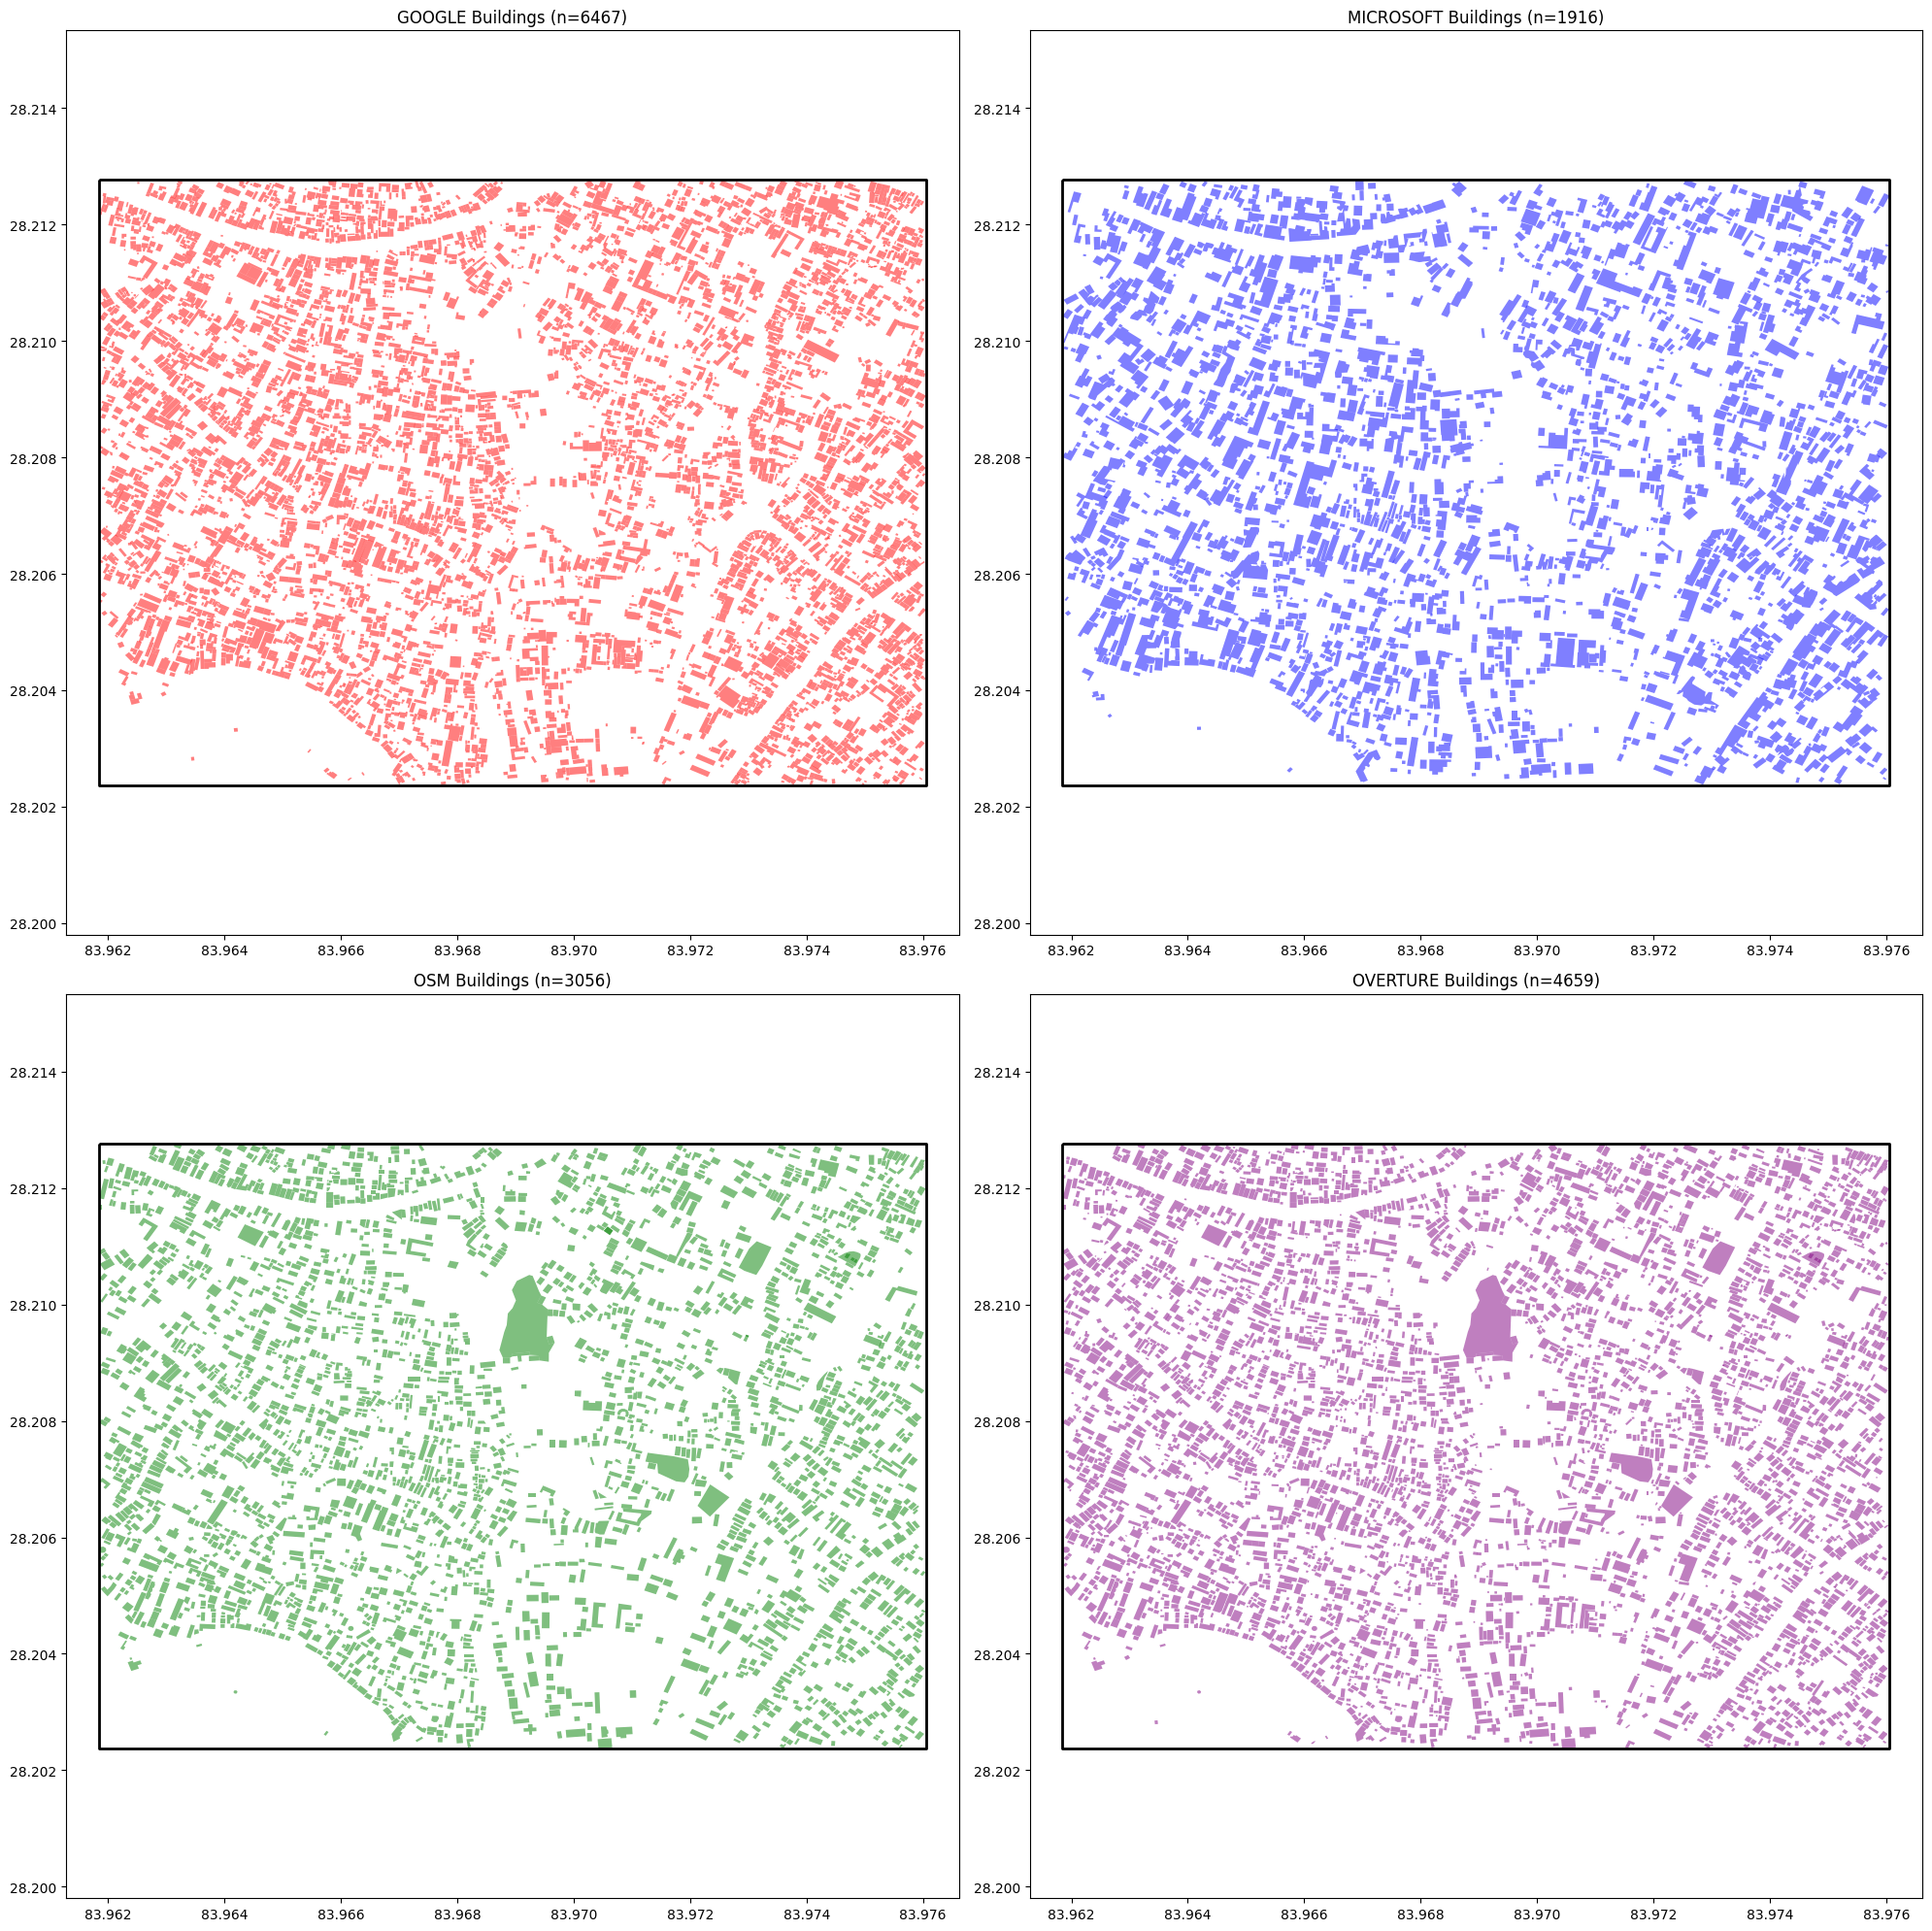

In [ ]:
# Create a 2x2 subplot for comparison
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.ravel()

colors = {
    "google": "red",
    "microsoft": "blue",
    "osm": "green",
    "overture": "purple"
}

for idx, (source, gdf) in enumerate(results.items()):
    # Plot AOI boundary
    aoi_gdf.boundary.plot(ax=axes[idx], color='black', linewidth=2)

    # Plot buildings
    gdf.plot(
        ax=axes[idx],
        color=colors[source],
        alpha=0.5,
        label=source
    )

    axes[idx].set_title(f"{source.upper()} Buildings (n={len(gdf)})")
    # axes[idx].legend()
    axes[idx].axis('equal')

plt.tight_layout()
plt.savefig('building_comparison.png', dpi=300, bbox_inches='tight')
plt.show()